# Projeto desafio Keggle Previsão do Preço de Tratores🚜
###  <font color = '#FF8C00' > *Resolvendo um desafio do Keggle*
   *by [Guilherme Lima](https://www.linkedin.com/in/gui-lima-oficial/)*

## Contexto:

Esse projeto veio de um desafio do keggle, pelo que entendi uma empresa a 9 anos atrás, abriu uma disputa de quem fazia o melhor modelo de previsão dos preçõs dos tratores, para os ganhadores(1,2,3 lugar) havia um prémio em dinheiro, pena que eu não pude participar... mais informações podem ser vistas na própria pagina do Keggle: https://www.kaggle.com/c/bluebook-for-bulldozers/overview

## Objetivo do projeto:

Meu objetivo vai ser o de treinar mesmo, pois como eu ja comentei acima, esse case já foi resolvido e já deram os premios,(que pena) então o intuito vai ser criar um modelo bom, que tenha um desempenho na métrica de avaliação principal da competição que e a metrica de ( RMSLE mean_squared_log_error), então o meu objetivo vai ser ter um bom RMSLE, e vou fazer tudo aquilo que eu acreditar ser relevante para chegar nesse objetivo, sempre tendo em mente o objetivo, pois como e um projeto grande, vamos ter muitas colunas e muitas linhas, então todas as minhas decisões vao impactar de alguma forma algo no final do projeto, então todas as minhas decisões não vao ser tomadas atoa ou sem base nenhuma, eu vou me certificar de que voce que está lendo agora, entenda o por que eu fiz aquilo e não fiz outra coisa.

## Fonte de dados:

Como eu já comentei esse projeto foi tirado de um desafio do keggle, então todos os seus dados, dicionario, tudo está disponivel para downlaord, neste link: https://www.kaggle.com/c/bluebook-for-bulldozers/data

---

## Metodologia que vamos seguir:

### Etapas do projeto:

#### Etapa 1: Definição do problema


Essa é a etapa principal de qualquer projeto, pois se voce não consegue entender bem o objetivo daquilo que voce está desenvolvendo, voce acaba por não tomar boas decisões, pois não tem em mente o objetivo claro de onde voce quer chegar.

#### Etapa 2: Importar as bibliotecas Necessarias para o projeto

Outra etapa importante, pois não precisamos recriar a roda, claro que usamos muita lógica aqui para resolver nosso problema, porém não precisamos codar tudo do zero, tem muita coisa pronta.

#### Etapa 3: Extração dos dados

Nessa etapa que vamos usar as bibliotecas acima, pois com elas, podemos carregar nossos dados para o python, e assim conseguir desenrolar nossas analises e tratamentos.

#### Etapa 4: Tratamento dos dados

Depois da etapa de definição do objetivo, eu acredito que essa e a etapa mais importante para qualquer projeto de analise de dados, pois sem ela voce acaba trabalhando com valores nulos, valores inf e outros tipo de valores que te atrapalham muito na hora de explorar os dados, então já deixa a base de dados limpa e organizada, permite que possamos ter uma maior facilidade na hora de explorar nossos dados, essa também e a etapa que eu faço feature engineering que e um nome bonito para "criar novas colunas".

#### Etapa 5: Exploração dos dados.

Até esse ponto e onde podemos dizer que o analista de dados vai, pois nessa etapa de exploração e a etapa que muitas das nossas perguntas vão ser respondidas e dependendo do problema, já obtemos a resposta aqui, sem a necessidade da criação do modelo, por isso essa e uma etapa muito importante, pois nela que vamos responder perguntas tipo, "Qual e a distribuição de tratores fabricados ao longo dos anos", coisas do tipo, se fosse um problema de analise de dados, nos pararíamos aqui.

#### Etapa 6: Aplicação e Avaliação do Modelo (ML)

E aqui que vamos responder nossa pergunta de previsão, como a nossa pergunta e algo mais pra frente pois estamos trabalhando com time series, somente a exploração de dados não seria o suficiente para sanar nossa duvida, por causa disso que nessa etapa eu vou usar os principais modelos de ML, para conseguir através deles, ter uma boa previsão dos meus preços.

#### Etapa 7: Melhorando o modelo

Outra etapa com uma extrema importancia, pois nela que vamos ver as principais informações que o modelo considera relevante e outra coisa melhorar, eu tenho um surpresa nessa etapa, que voce so vai ver no final do projeto :)

#### Etapa 8: Conclusão

Etapa meio que desprezada, mas que eu gosto muito, de conclui meu trabalho, fazendo alguma consideração ou levantar alguma palta, gosto muito dessa etapa também, mesmo que obviamente não tenha relação com a previsão em si do meu modelo.

---

## Iniciando o projeto

#### Etapa 2: Importar as bibliotecas Necessarias para o projeto

In [1]:
#Importando as bibliotecas necessarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#---
#Biblioteca de avaliação
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error
#---

#Bibliotecas de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR

#---
#Filtrar avisos desnecessários
import warnings
warnings.filterwarnings('ignore')

#---
#SETS
%matplotlib inline
plt.style.use("dark_background")

---

#### Etapa 3: Extração dos dados

In [2]:
#Lendo minha base de dados
df = pd.read_csv('TrainAndValid.csv',parse_dates=['saledate'])

#Exibindo as primeiras entradas
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Como podemos notar nas primeiras entradas, existem valores nulos que precisamos tratar, então vamos ver as informações gerais e confirmar a quantidade de valores nulos para descidimos como vamos lidar com eles.

---

#### Etapa 4: Tratamento dos dados

In [3]:
#Informações gerais dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [4]:
#Verificando a quantidade de valores nulos
df.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [5]:
#Vamos ver a porcentagem de valores nulos
df.isnull().sum()/df.shape[0]

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
saledate                    0.000000
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
T

##### Existem dados que tem mais de 80% das informações vazias, ou seja, não é algo que possa ser tratado já que a esmagadora maioria das informações é vazia, então não faz sentido fazer algum tratamento de preenchimento com colunas tão vazias assim, então nesse caso, eu vou escolher remover as colunas que tem mais de 300 mil de valores nulos.

In [6]:
#Excluindo as colunas com valores extramemnte nulos
for coluna in df:
    if df[coluna].isnull().sum() > 300000:
        df = df.drop(coluna, axis=1)

#Reverificando minhas informações nulas
print(df.isnull().sum())

print('='*70)

#Revendo a porcentagem de valores nulos
print(df.isnull().sum()/df.shape[0])

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Enclosure                      334
Forks                       214983
Ride_Control                259970
Transmission                224691
Hydraulics                   82565
Coupler                     192019
dtype: int64
SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.0000

- Como podemos ver, ainda temos muitas colunas com valores vazios, mas como não são colunas com valores que não tem mais de 80% dos dados nulos, eu vou passar por uma fase manual de decisão de qual coluna eu vou manter, através dos dicionário das colunas eu vou poder ver qual e a importância de cada uma das colunas, e caso eu ache que alguma das colunas que tem esses valores nulos é realmente necessaria para a minha analise eu vou escolher mante-la.

In [7]:
#Pegando as primeiras 1000 mil linhas dos meus dados para analisar coluna por coluna
analise_coluna = df[:1000]
#Transformando em arquivo excel
analise_coluna.to_excel('Analisar_colunas.xlsx',index=False)

#### Qual sera o criterio de remoção das colunas?
- O criteiro vai ser o meu objetivo, com o meu objetivo já especificado e bem claro, eu vou poder remover colunas que eu julgar desnecessária para o projeto, por isso as colunas que vão ser removidas são:

- Colunas de ID: Id não tem nada haver com meu objetivo, já que ele é um numero aleatório gerado automaticamente, não faz sentido nenhum deixar eles nos meus dados, já que eles só vão atrapalhar.

- Coluna de MachineHoursCurrentMeter:
    - Explicação:
        - Essa coluna parece ter uma informação importante que o uso da maquina em horas no momento da venda, sim eu sei que em teoria eu deveria manter, porém, analisando acima podemos ver que essa coluna tem mais de 62% dos seus dados nulos, ou seja, não e uma informação importante na hora da venda e outro ponto e que podemos ver que a maioria dos dados está com o valor 0, ou seja, segundo o dicionário de dados, 0 ou nulo quer dizer que nenhuma informação foi passada, então não tem como preencher uma coluna com mais de 50% dos valores vazios, no futuro, talves eu possa voltar aqui e deixar essa essa coluna para ver como o modelo se comporta mais não acho que ela va impactar em muita coisa, então vou excluir.

- Coluna de Desc: 
    - Explicação:
        - Existem 5 colunas de descrisão nos meus dados, e todas parecem falar da mesma coisa de uma forma diferente então eu vou deixar só a principal, e no futuro eu transformo ela em coluna numerica para poder ser treinada, porém isso e algo que eu também posso reconsiderar no futuro, e excluir todas as colunas, vamos ver o resultado mais pra frente.
    - Colunas excluidas: fiBaseModel,fiSecondaryDesc,fiProductClassDesc, ProductGroupDesc

- Colunas de Forks, Ride_Control e Coupler: A maioria dos dados está como vazio ou não especificado, então não faz sentido mante-la, pois parece que não tem relação com meu objetivo, então vou remover

In [8]:
#Analise da coluna de MachineHoursCurrentMeter, dando embasamento a minha exclusão de uma coluna que talvez seria importante
#para o modelo.
df['MachineHoursCurrentMeter'].value_counts().iloc[:5]

0.0       73834
2000.0      124
1000.0      117
24.0        115
1500.0      101
Name: MachineHoursCurrentMeter, dtype: int64

In [9]:
#Analise da coluna de Forks
df['Forks'].value_counts()

None or Unspecified    183061
Yes                     14654
Name: Forks, dtype: int64

In [10]:
#Analise da coluna de Ride_Control
df['Ride_Control'].value_counts()

No                     79389
None or Unspecified    64693
Yes                     8646
Name: Ride_Control, dtype: int64

In [11]:
#Analise da coluna de Ride_Control
df['Coupler'].value_counts()

None or Unspecified    190449
Manual                  23918
Hydraulic                6312
Name: Coupler, dtype: int64

#### Depois de uma analise qualitativa, analisando coluna por coluna, tendo em mente o objetivo do meu projeto, que é prever o preço de um Trator🚜, eu descidir manter as seguintes colunas:

In [12]:
#Colunas que serão mantidas
colunas_mantidas = ['SalePrice','YearMade','saledate','fiModelDesc','ProductSize','state','ProductGroup','Enclosure','Transmission','Hydraulics']

#Criando uma copia do Df principal para não prejudicar a estutura.
copia_df = df.copy()

#Filtrando meus dados para pegar apenas as colunas que serão mantidas
copia_df = copia_df[colunas_mantidas]

#Exibindo
copia_df.head()

,SalePrice,YearMade,saledate,fiModelDesc,ProductSize,state,ProductGroup,Enclosure,Transmission,Hydraulics
0,66000.0,2004,2006-11-16,521D,NaN,Alabama,WL,EROPS w AC,NaN,2 Valve
1,57000.0,1996,2004-03-26,950FII,Medium,North Carolina,WL,EROPS w AC,NaN,2 Valve
2,10000.0,2001,2004-02-26,226,NaN,New York,SSL,OROPS,NaN,Auxiliary
3,38500.0,2001,2011-05-19,PC120-6E,Small,Texas,TEX,EROPS w AC,NaN,2 Valve
4,11000.0,2007,2009-07-23,S175,NaN,New York,SSL,EROPS,NaN,Auxiliary


- Pronto, agora temos nossas colunas que eu acredito ser relevante para as analises dos modelos, porém como estamos lidando com Times Series, vamos precisar de colunas de Time(Tempo), então vamos retirar essas informações da minha coluna de Date, e deixar separado o dia, o ano, etc...

In [13]:
#Pegando as informação atraves da coluna de saledate
copia_df['Year'] = copia_df['saledate'].dt.year
copia_df['Month'] = copia_df['saledate'].dt.month
copia_df['Day'] = copia_df['saledate'].dt.day

#Exibindo
copia_df.head()

,SalePrice,YearMade,saledate,fiModelDesc,ProductSize,state,ProductGroup,Enclosure,Transmission,Hydraulics,Year,Month,Day
0,66000.0,2004,2006-11-16,521D,NaN,Alabama,WL,EROPS w AC,NaN,2 Valve,2006,11,16
1,57000.0,1996,2004-03-26,950FII,Medium,North Carolina,WL,EROPS w AC,NaN,2 Valve,2004,3,26
2,10000.0,2001,2004-02-26,226,NaN,New York,SSL,OROPS,NaN,Auxiliary,2004,2,26
3,38500.0,2001,2011-05-19,PC120-6E,Small,Texas,TEX,EROPS w AC,NaN,2 Valve,2011,5,19
4,11000.0,2007,2009-07-23,S175,NaN,New York,SSL,EROPS,NaN,Auxiliary,2009,7,23


In [14]:
#Como já temos essas informações separadas, agora podemos retirar a coluna de saledate, pois ela se tornou irrelevante.
copia_df.drop('saledate',axis=1,inplace=True)

In [15]:
#Verificando os valores nulos das minhas colunas mantidas
copia_df.isnull().sum()

SalePrice            0
YearMade             0
fiModelDesc          0
ProductSize     216605
state                0
ProductGroup         0
Enclosure          334
Transmission    224691
Hydraulics       82565
Year                 0
Month                0
Day                  0
dtype: int64

In [16]:
#Transformando as colunas categoricas em Numericas.
for label, content in copia_df.items():
    if not pd.api.types.is_numeric_dtype(content):
    #Transformando colunas categoricas em numericas e adicionando +1(pois existem valores negativos, que são os valores nulos, eles já serão tratados.)
        copia_df[label] = pd.Categorical(content).codes + 1

In [17]:
#Exibindo
copia_df.head()

,SalePrice,YearMade,fiModelDesc,ProductSize,state,ProductGroup,Enclosure,Transmission,Hydraulics,Year,Month,Day
0,66000.0,2004,963,0,1,6,3,0,1,2006,11,16
1,57000.0,1996,1745,4,33,6,3,0,1,2004,3,26
2,10000.0,2001,336,0,32,3,6,0,4,2004,2,26
3,38500.0,2001,3716,6,44,4,3,0,1,2011,5,19
4,11000.0,2007,4261,0,32,3,1,0,4,2009,7,23


In [18]:
#Reverificando se existe valores nulos
copia_df.isnull().sum()

SalePrice       0
YearMade        0
fiModelDesc     0
ProductSize     0
state           0
ProductGroup    0
Enclosure       0
Transmission    0
Hydraulics      0
Year            0
Month           0
Day             0
dtype: int64

In [19]:
#Informações gerais
copia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   SalePrice     412698 non-null  float64
 1   YearMade      412698 non-null  int64  
 2   fiModelDesc   412698 non-null  int16  
 3   ProductSize   412698 non-null  int8   
 4   state         412698 non-null  int8   
 5   ProductGroup  412698 non-null  int8   
 6   Enclosure     412698 non-null  int8   
 7   Transmission  412698 non-null  int8   
 8   Hydraulics    412698 non-null  int8   
 9   Year          412698 non-null  int64  
 10  Month         412698 non-null  int64  
 11  Day           412698 non-null  int64  
dtypes: float64(1), int16(1), int64(4), int8(6)
memory usage: 18.9 MB


In [20]:
#Linhas e colunas
copia_df.shape

(412698, 12)

---

#### Etapa 5: Exploração dos dados.

In [21]:
#Colunas que são numericas originais.
lista_colunas = ['SalePrice','YearMade','Year','Month','Day']

#Vendo as informações estatisticas dos meus dados
copia_df[lista_colunas].describe()

,SalePrice,YearMade,Year,Month,Day
count,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000
mean,31215.181414,1899.049637,2004.317382,6.300268,16.152894
std,23141.743695,292.190243,5.821090,3.437276,8.429510
min,4750.000000,1000.000000,1989.000000,1.000000,1.000000
25%,14500.000000,1985.000000,2000.000000,3.000000,9.000000
50%,24000.000000,1995.000000,2006.000000,6.000000,16.000000
75%,40000.000000,2001.000000,2009.000000,9.000000,23.000000
max,142000.000000,2014.000000,2012.000000,12.000000,31.000000


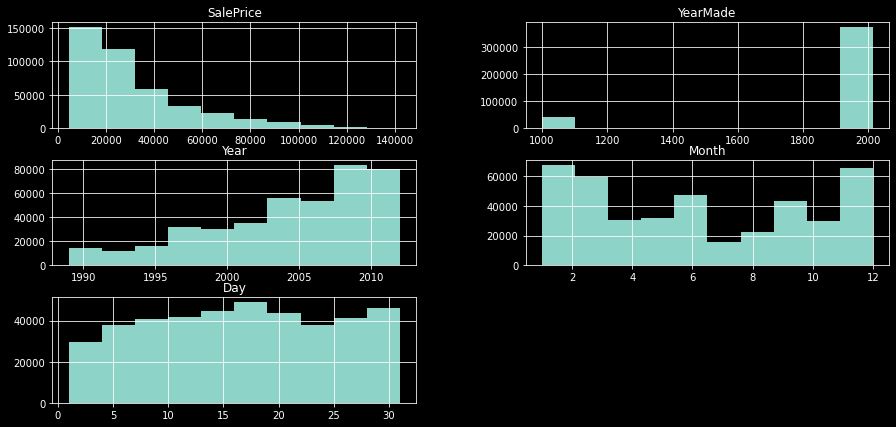

In [22]:
#Grafico de histrograma dos meus dados numericos
copia_df[lista_colunas].hist(figsize=(15,7));

##### Observações sobre o grafico de hist
- Olhando a coluna de SalePrice, podemos notar que a maioria dos nossos dados está entre 100 mil e 200 mil então pode ser que exista outliers, mas isso e algo a ser estudado ainda.
- A coluna de Ano Feito, por alguma razão tem um pico no ano 1000, e depois só volta a ter informações relevantes no ano 2000, acredito ser algum erro no sistema, pois não parece fazer muito sentido de primeiro momento o ano mil ter tantas informações.

---

### Respondendo algumas perguntas
- Aqui vou demostrar o poder dessa fase de exploração dos dados, claro que não vou me aprofundar complemente nas analises, pois não é esse o meu objetivo, porém vou dar um deslumbre de como podemos plotar graficos que nos deem informações relevantes.

##### Quais os Top 5 anos que tivemos mais movimento?

In [23]:
#Respondendo a pergunta em forma numérica.
copia_df['Year'].value_counts()[:5]

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
Name: Year, dtype: int64

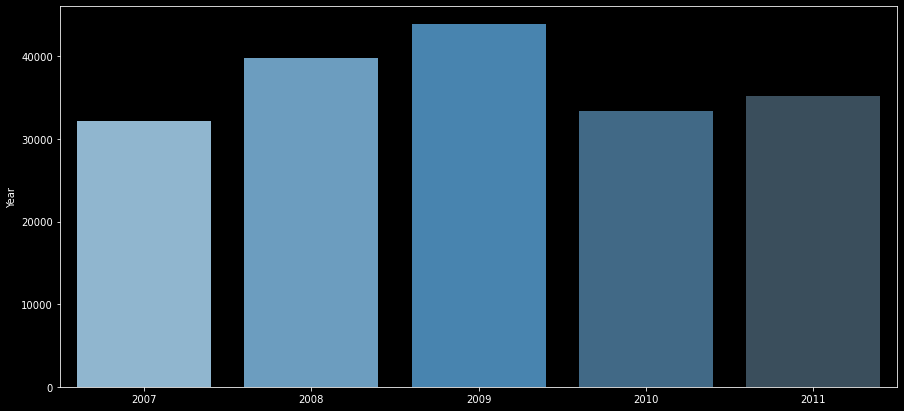

In [24]:
#Vendo em forma grafica
plt.figure(figsize=(15,7))
sns.barplot(
    x= copia_df['Year'].value_counts()[:5].index,
    y= copia_df['Year'].value_counts()[:5],
    palette="Blues_d"
);

###### Podemos ver que no ano de 2019 foi o ano que tivemos mais movimento, ou seja, a quantidade de vezes que essa coluna aparece e maior do que as outras, então nesse ano tivemos mais venda de tratores🚜

##### Quais os Top 5 meses que tivemos mais movimento?

In [25]:
#Respondendo a pergunta em forma numérica.
copia_df['Month'].value_counts()[:5]

3     59354
2     56319
6     47045
9     43214
12    39778
Name: Month, dtype: int64

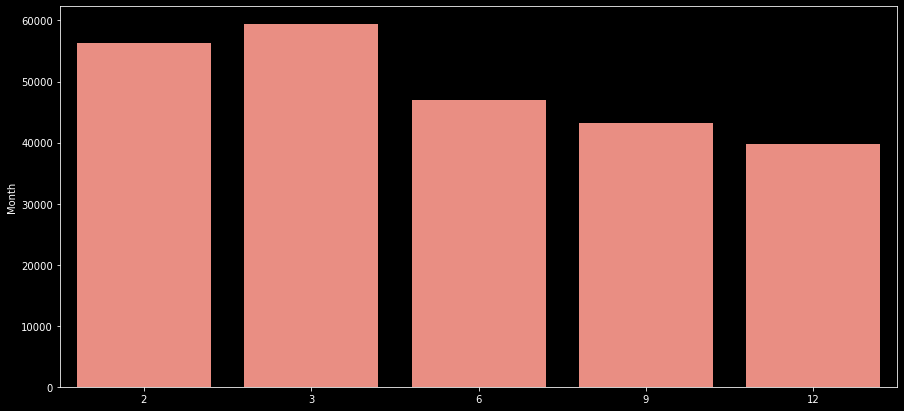

In [26]:
#Vendo em forma grafica
plt.figure(figsize=(15,7))
sns.barplot(
    x= copia_df['Month'].value_counts()[:5].index,
    y= copia_df['Month'].value_counts()[:5],
    color="salmon"
);

##### Mesma coisa do gráfico acima, nos podemos notar que no mês 3 teve o maior pico de venda de tratores🚜 considerando todos os anos, e bom relembra que essas informações de Ano, mes e dia vieram da coluna saladate, que e a coluna que nos dias quando foi a Data da Venda.

##### Quais os Top 5 dias que tivemos mais movimento?

In [27]:
#Respondendo a pergunta.
copia_df['Day'].value_counts()[:5]

15    18678
16    18672
20    15819
18    15696
12    15146
Name: Day, dtype: int64

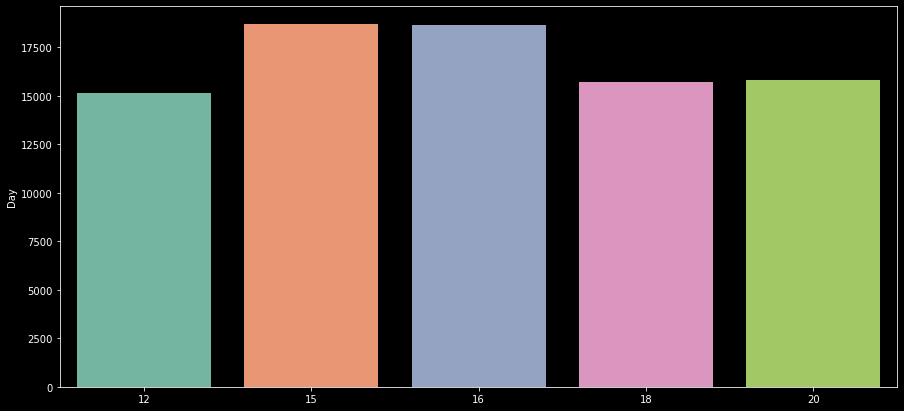

In [28]:
#Vendo em forma grafica
plt.figure(figsize=(15,7))
sns.barplot(
    x= copia_df['Day'].value_counts()[:5].index,
    y= copia_df['Day'].value_counts()[:5],
    palette='Set2'
);

##### Podemos notar que no dia 15 e 16 foram os nossos dias campeões, relembrando que esses dados são de todas as minhas informações, ou seja, são de todos os dias do ano, o dia 15 e 16 foram os que mais apareceram.

##### Distribuição do preço da venda ao longo dos anos.

In [29]:
#Agrupando os dados por Year e pegando a soma de Saleprice
copia_df.groupby('Year')['SalePrice'].sum().index

Int64Index([1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
            2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012],
           dtype='int64', name='Year')

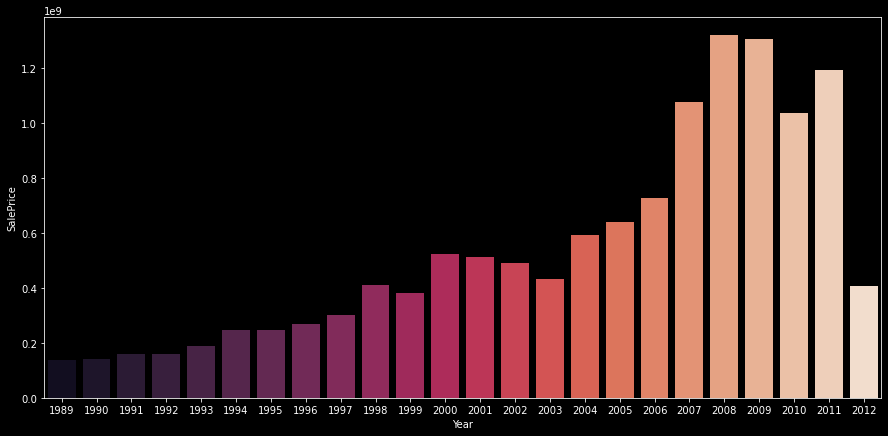

In [30]:
#Vendo em forma grafica
plt.figure(figsize=(15,7))
sns.barplot(
    x= copia_df.groupby('Year')['SalePrice'].sum().index,
    y= copia_df.groupby('Year')['SalePrice'].sum(),
    palette='rocket'
);

##### Como podemos ver, começamos a ter venda de tratores🚜 a partir do ano 1989 e dai as coisas so foram crescendo de forma normal até 2011,  pois em 2012 tivemos uma queda, porém como dito no inicio do projeto, esse projeto e um desafio do keggle e nele o ano de 2012 e a coluna de validação do nosso modelo, então julgo que ela não está completa e por isso essa baixa repentina, e claro que e algo que precisa ser mais aprofundado.

##### Distribuição do preço da venda ao longo dos meses.

In [31]:
#Agrupando os dados por Year e pegando a soma de Saleprice
copia_df.groupby('Month')['SalePrice'].sum().index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Month')

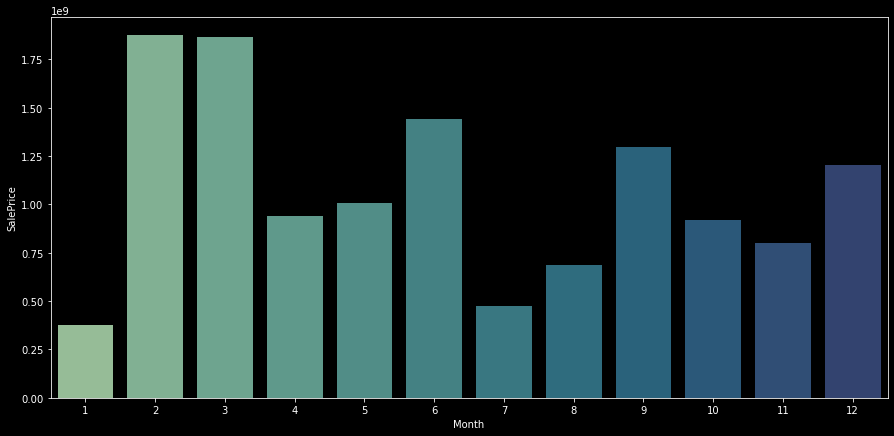

In [32]:
#Vendo em forma grafica
plt.figure(figsize=(15,7))
sns.barplot(
    x= copia_df.groupby('Month')['SalePrice'].sum().index,
    y= copia_df.groupby('Month')['SalePrice'].sum(),
    palette='crest'
);

##### Como podemos notar os meses 2 e 3 foram os que tiveram um maior pico de venda de tratores🚜

#### Qual os Top 5 anos com caminhões mais fabricados?

In [33]:
#Respondendo a pergunta.
copia_df['YearMade'].value_counts()[1:6]

2005    22096
1998    21751
2004    20914
1999    19274
1997    19269
Name: YearMade, dtype: int64

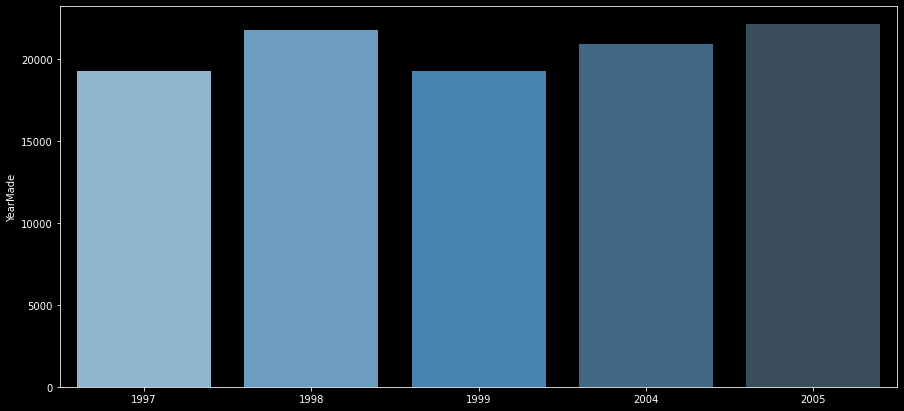

In [34]:
#Vendo em forma grafica
plt.figure(figsize=(15,7))
sns.barplot(
    x= copia_df['YearMade'].value_counts()[1:6].index,
    y= copia_df['YearMade'].value_counts()[1:6],
    palette="Blues_d"
);

###### Para conseguir plotar um grafico assim, foi necessario retirar as informações do ano 1000 mil, pois elas são tão grandes(Será mostrado abaixo) que esmaga todas as outras informações então descidir fazer sem ela.

##### Distribuição do preço da venda ao longo dos anos de fabricação.

In [35]:
#Agrupando os dados por Year e pegando a soma de Saleprice
copia_df.groupby('YearMade')['SalePrice'].sum().index[:40]

Int64Index([1000, 1919, 1920, 1937, 1942, 1947, 1948, 1949, 1950, 1951, 1952,
            1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
            1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
            1975, 1976, 1977, 1978, 1979, 1980, 1981],
           dtype='int64', name='YearMade')

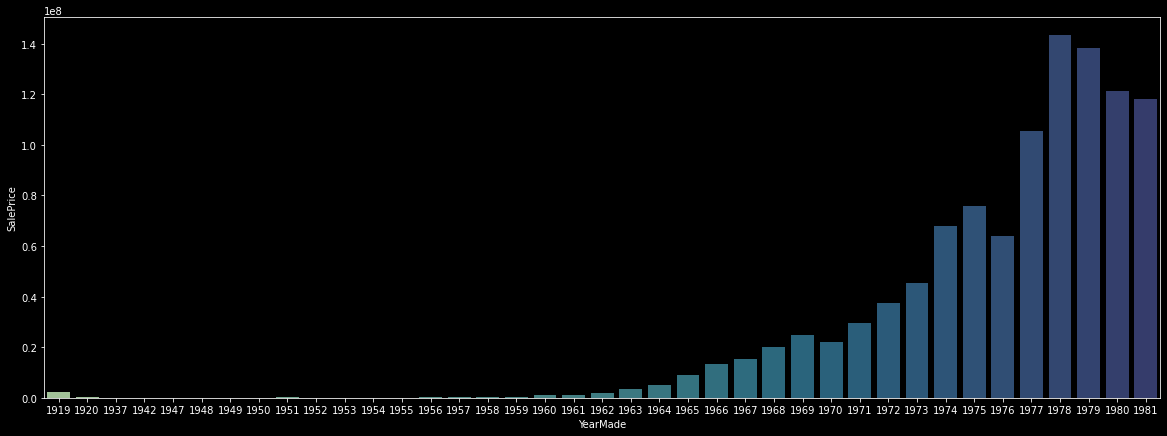

In [36]:
#Vendo em forma grafica
plt.figure(figsize=(20,7))
sns.barplot(
    x= copia_df.groupby('YearMade')['SalePrice'].sum().index[1:40],
    y= copia_df.groupby('YearMade')['SalePrice'].sum()[1:40],
    palette='crest'
);

##### Por algum motivo as informações dos tratores🚜 no ano mil (1000) são muito maiores que as dos anos seguintes, e como esse ano estava apagando os outros graficos, eu descidir criar um grafico sem ter ele, pois parece mais um erro de cadastramento do um ano de fabricação.

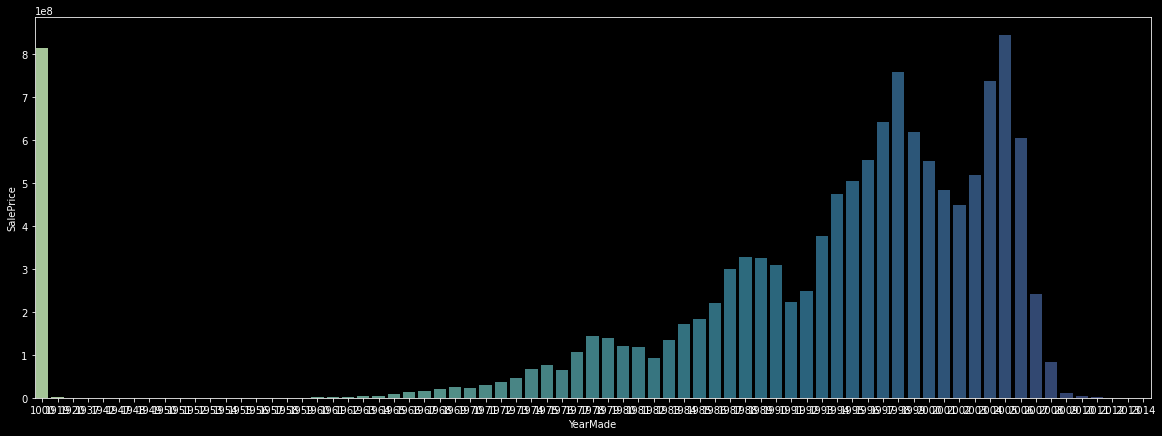

In [37]:
#GRAFICO SEM REMOVER O ANO MIL
#Vendo em forma grafica
plt.figure(figsize=(20,7))
sns.barplot(
    x= copia_df.groupby('YearMade')['SalePrice'].sum().index,
    y= copia_df.groupby('YearMade')['SalePrice'].sum(),
    palette='crest'
);

##### Aqui podemos ver o grafico sem retirar o ano 1000 mi, como pode ser notado que as informações nessa coluna são muito maiores que as dos anos seguintes até os meados de 1900, ou seja, nos graficos acima, não iria mostrar nada.

---

#### Etapa 6: Aplicação do modelo e Avaliando ele

In [38]:
#Separando os dados entre Validação e Train, como podemos ver na descrição do desafio no inicio do projeto
def_val = copia_df[copia_df['Year']==2012]
def_train = copia_df[copia_df['Year']!=2012]

len(def_val),len(def_train)

(11573, 401125)

In [39]:
#Seperando entre x e y
x_train, y_train = def_train.drop('SalePrice',axis=1), def_train.SalePrice
x_valid, y_valid = def_val.drop('SalePrice', axis=1), def_val.SalePrice

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((401125, 11), (401125,), (11573, 11), (11573,))

In [40]:
#Definindo a função que vai avaliar meu modelo

def Avaliarmodelo(nome_modelo,y_test,previsao):
    r2 = r2_score(y_test, previsao)
    RMSE = np.sqrt(mean_squared_error(y_test,previsao))
    RMSLE = np.sqrt(mean_squared_log_error(y_test,previsao)) #Métrica principal de avaliação do modelo no desafio
    return f'O Modelo: {nome_modelo}\nTeve o R² de: {r2:.2%}\nRMSE de: {RMSE:.2f}\nRMSLE de: {RMSLE:.2%}'

In [41]:
modelo_rf = RandomForestRegressor()
modelo_et = ExtraTreesRegressor()
modelo_dc = DecisionTreeRegressor()

Modelos = {
    'RandomForest': modelo_rf,
    #'LinearRegression':modelo_lr,
    'ExtraTress':modelo_et,
    'Decision Tree Regressor':modelo_dc,
}

In [42]:
%%time

for nome_modelo, Modelo in Modelos.items():
    #Treinando o modelo
    Modelo.fit(x_train, y_train)
    #Prevendo
    previsao = Modelo.predict(x_valid)
    #Avaliando
    print(Avaliarmodelo(nome_modelo,y_valid, previsao))
    
    print('='*70)

O Modelo: RandomForest
Teve o R² de: 85.56%
RMSE de: 9957.67
RMSLE de: 27.10%
O Modelo: ExtraTress
Teve o R² de: 83.61%
RMSE de: 10609.05
RMSLE de: 29.01%
O Modelo: Decision Tree Regressor
Teve o R² de: 75.04%
RMSE de: 13094.21
RMSLE de: 35.50%
Wall time: 5min 3s


#### Etapa 7: Escolher do melhor modelo e melhorando ele.
- Como o modelo de Decision Tree Teve o maior desempenho na principal metrica de avaliação do desafio, eu vou escolher mante-lo, e buscar alguma forma de melhorado, como por exemplo fazendo um Hyper tunning ou removendo colunas que ele não acha relevante.

In [43]:
#Função que vai criar um grafico com as features usadas pelo modelo

def Importancia_coluna(modelo,coluna):
    #Dados
    modelo_importances = pd.DataFrame(modelo.feature_importances_,coluna.columns)
    #Ordenando
    modelo_importances.sort_values(by=0,ascending=False,inplace=True)
    #Grafico
    grafico = plt.figure(figsize=(12,6))
    sns.barplot(x= modelo_importances.index,y= modelo_importances[0])

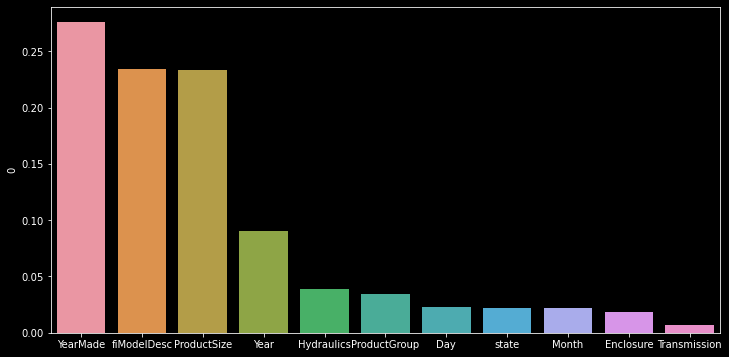

In [44]:
#Aplicando a função.
Importancia_coluna(modelo_dc,x_train)

- Como podemos notar a coluna de Transmission, praticamente não impacta no meu modelo de Machine Learning, então eu vou excluir ela para ver se o modelo tem alguam melhora ou piora.

#### Etapa surpresa
- Eu vou testar outro tipo de modelagem, que é transformar as colunas categorias, não em numericas dessa vez!! mas sim em dummy, ou seja, 0 e 1, que eu particulamente acho mais atrativo para o modelo, pois ele pode acabar considerando coisas que não são quanto transformamos elas em numericas,então eu vou testar de outra forma. 😁

##### Refazendo minha modelagem.

In [45]:
#DataFrame original
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saledate,fiModelDesc,...,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Enclosure,Forks,Ride_Control,Transmission,Hydraulics,Coupler
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,2006-11-16,521D,...,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,EROPS w AC,None or Unspecified,None or Unspecified,NaN,2 Valve,None or Unspecified
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,2004-03-26,950FII,...,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,EROPS w AC,None or Unspecified,None or Unspecified,NaN,2 Valve,None or Unspecified
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,2004-02-26,226,...,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,OROPS,None or Unspecified,NaN,NaN,Auxiliary,None or Unspecified
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,2011-05-19,PC120-6E,...,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,EROPS w AC,NaN,NaN,NaN,2 Valve,None or Unspecified
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,2009-07-23,S175,...,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,EROPS,None or Unspecified,NaN,NaN,Auxiliary,None or Unspecified


In [51]:
#As colunas que eu escolhidas anteriomente eu vou manter, menos as colunas que
#eu achar que estão mais atrapalhando do que ajudando, que no caso são a coluna de Desc e Transmission(deu o maior trabalho escolher '-')

#Colunas que vou manter
colunas_mantidas = ['SalePrice','YearMade','saledate','ProductSize','state','ProductGroup','Enclosure','Hydraulics']

#Filtrando meus dados.
testes_df_v1 = df[colunas_mantidas]

#Entradas.
testes_df_v1.head()

,SalePrice,YearMade,saledate,ProductSize,state,ProductGroup,Enclosure,Hydraulics
0,66000.0,2004,2006-11-16,NaN,Alabama,WL,EROPS w AC,2 Valve
1,57000.0,1996,2004-03-26,Medium,North Carolina,WL,EROPS w AC,2 Valve
2,10000.0,2001,2004-02-26,NaN,New York,SSL,OROPS,Auxiliary
3,38500.0,2001,2011-05-19,Small,Texas,TEX,EROPS w AC,2 Valve
4,11000.0,2007,2009-07-23,NaN,New York,SSL,EROPS,Auxiliary


In [52]:
#Pegando as informação atraves da coluna de saledate
testes_df_v1['Year'] = testes_df_v1['saledate'].dt.year
testes_df_v1['Month'] = testes_df_v1['saledate'].dt.month
testes_df_v1['Day'] = testes_df_v1['saledate'].dt.day

#Como já temos essas informações separadas, agora podemos retirar a coluna de saledate, pois ela se tornou irrelevante.
testes_df_v1.drop('saledate',axis=1,inplace=True)

#Exibindo
testes_df_v1.head()

,SalePrice,YearMade,ProductSize,state,ProductGroup,Enclosure,Hydraulics,Year,Month,Day
0,66000.0,2004,NaN,Alabama,WL,EROPS w AC,2 Valve,2006,11,16
1,57000.0,1996,Medium,North Carolina,WL,EROPS w AC,2 Valve,2004,3,26
2,10000.0,2001,NaN,New York,SSL,OROPS,Auxiliary,2004,2,26
3,38500.0,2001,Small,Texas,TEX,EROPS w AC,2 Valve,2011,5,19
4,11000.0,2007,NaN,New York,SSL,EROPS,Auxiliary,2009,7,23


In [53]:
#Verificando os valores nulos
testes_df_v1.isnull().sum()

SalePrice            0
YearMade             0
ProductSize     216605
state                0
ProductGroup         0
Enclosure          334
Hydraulics       82565
Year                 0
Month                0
Day                  0
dtype: int64

In [54]:
#Como são valores de texto, eu vou trocar pelo valor mais frequente
testes_df_v1 = testes_df_v1.fillna(testes_df_v1['ProductSize'].mode()[0])
testes_df_v1 = testes_df_v1.fillna(testes_df_v1['Hydraulics'].mode()[0])
testes_df_v1 = testes_df_v1.fillna(testes_df_v1['Enclosure'].mode()[0])

#Verificando novamente se ainda existe valores nulos
testes_df_v2.isnull().sum()

SalePrice       0
YearMade        0
ProductSize     0
state           0
ProductGroup    0
Enclosure       0
Hydraulics      0
Year            0
Month           0
Day             0
dtype: int64

### Agrupar categorias
- Como vamos transforma em dummy, vamos acabar tendo muitassss colunas, e para isso não ocorrer, vamos agrupar mais nossos dados, por na coluna de Hydraulics(abaixo), podemos ver que a maioria dos valores estão nos 5 primeiros, ou seja, o resto das informaçõs não vao ter praticamente nenhuma relevancia para o meu modelo, então e por isso que eu vou agrupar.

In [56]:
#Analisando em forma numerica
testes_df_v1['Hydraulics'].value_counts()

2 Valve                145317
Standard               106515
Medium                  82565
Auxiliary               43224
Base + 1 Function       25511
3 Valve                  5807
4 Valve                  3077
Base + 3 Function         311
Base + 2 Function         132
Base + 5 Function          94
Base + 4 Function          81
Base + 6 Function          54
None or Unspecified        10
Name: Hydraulics, dtype: int64

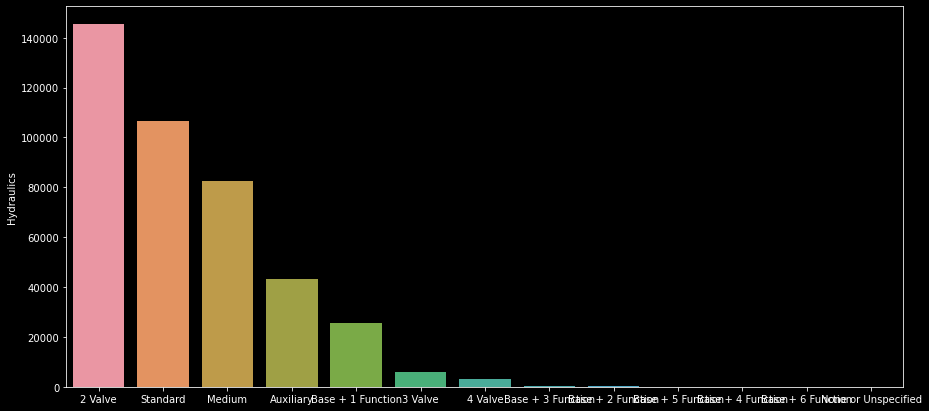

In [63]:
##Analisando em forma grafica
plt.figure(figsize=(15,7))
sns.barplot(
    x=testes_df_v1['Hydraulics'].value_counts().index,
    y=testes_df_v1['Hydraulics'].value_counts()
);

- Como podemos notar, os valores quase não aparecem.

<AxesSubplot:ylabel='Hydraulics'>

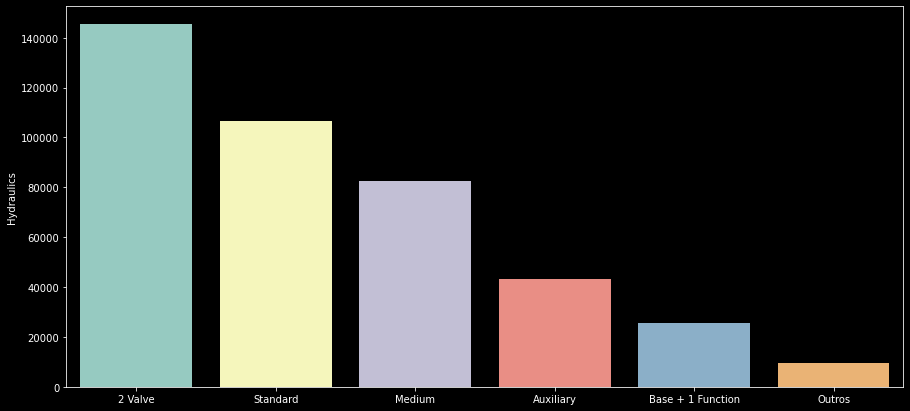

In [65]:
#Agrupando coluna de Hydraulics

#Valor, vamos usar uma regra de quantas quantidades devem ter, e se elas não baterem essa quantidade, eu vou agrupar
hydraulics = testes_df_v1['Hydraulics'].value_counts()

#Lista que vai receber as colunas
colunas = []


#Pecorrendo a lista
for tipo in hydraulics.index:
    #O tipo vai ser o nome da coluna, e atraves dela pegar o valor da coluna.
    if hydraulics[tipo] < 10000:
        #adicionado na minha lista vazia
        colunas.append(tipo)
        

#Modificando a minha base para agrupar esses valores
for tipo in colunas:
    testes_df_v1.loc[testes_df_v1['Hydraulics'] == tipo,'Hydraulics'] = 'Outros'
    
    
##Analisando em forma grafica
plt.figure(figsize=(15,7))
sns.barplot(
    x=testes_df_v1['Hydraulics'].value_counts().index,
    y=testes_df_v1['Hydraulics'].value_counts()
)

- Bem melhor agora, né? e se parece bom para nos, imagina para o modelo, ele vai agradecer.

---

- Agrupando a coluna de Enclosure

In [66]:
#Analisando em forma numerica
testes_df_v1['Enclosure'].value_counts()

OROPS                  177971
EROPS                  141769
EROPS w AC              92601
Medium                    334
EROPS AC                   18
NO ROPS                     3
None or Unspecified         2
Name: Enclosure, dtype: int64

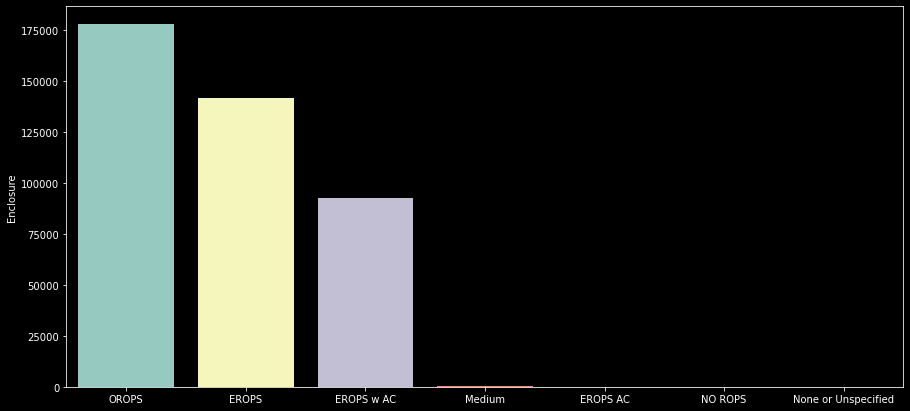

In [67]:
##Analisando em forma grafica
plt.figure(figsize=(15,7))
sns.barplot(
    x=testes_df_v1['Enclosure'].value_counts().index,
    y=testes_df_v1['Enclosure'].value_counts()
);

- Semelhante a analise que fizemos acima, os valores nem aparecem, então vamos agrupar.

<AxesSubplot:ylabel='Enclosure'>

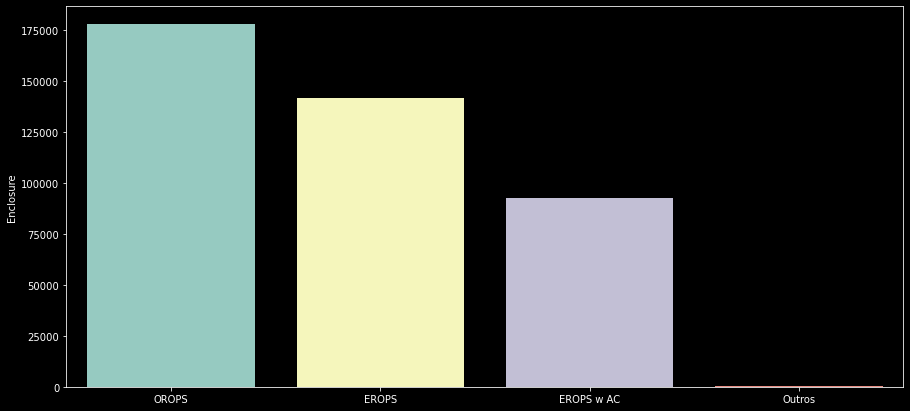

In [68]:
#Agrupando coluna de Hydraulics

#Valor, vamos usar uma regra de quantas quantidades devem ter, e se elas não baterem essa quantidade, eu vou agrupar
enclosure = testes_df_v1['Enclosure'].value_counts()

#Lista que vai receber as colunas
colunas = []


#Pecorrendo a lista
for tipo in enclosure.index:
    #O tipo vai ser o nome da coluna, e atraves dela pegar o valor da coluna.
    if enclosure[tipo] < 10000:
        #adicionado na minha lista vazia
        colunas.append(tipo)
        

#Modificando a minha base para agrupar esses valores
for tipo in colunas:
    testes_df_v1.loc[testes_df_v1['Enclosure'] == tipo,'Enclosure'] = 'Outros'
    
    
##Analisando em forma grafica
plt.figure(figsize=(15,7))
sns.barplot(
    x=testes_df_v1['Enclosure'].value_counts().index,
    y=testes_df_v1['Enclosure'].value_counts()
)

- Como podemos ver mesmo agrupando os valores, eles ainda não tem uma relevancia muito grande, eles ainda estão sendo esmagadores pelos valores maiores.

---

- Agrupando a coluna de State

In [60]:
#Analisando em forma numerica
testes_df_v1['state'].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

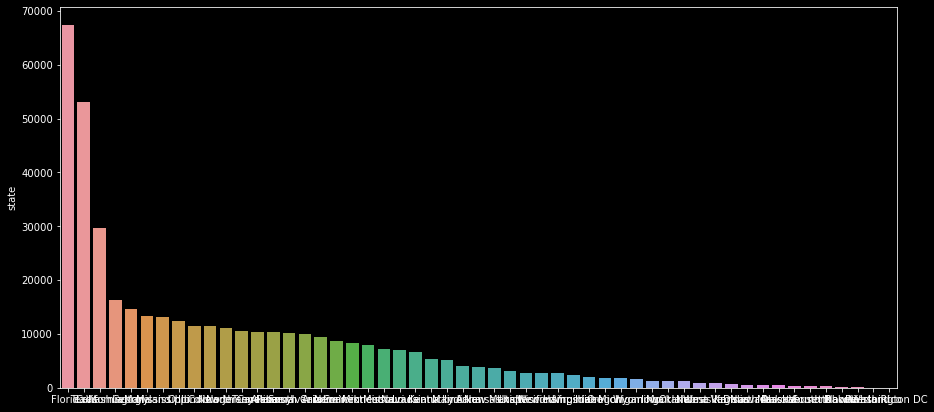

In [69]:
##Analisando em forma grafica
plt.figure(figsize=(15,7))
sns.barplot(
    x=testes_df_v1['state'].value_counts().index,
    y=testes_df_v1['state'].value_counts()
);

- Como podemos ver, os valores menores praticamente nem aparecem então, vamos agrupar para melhorar essas proporçoes

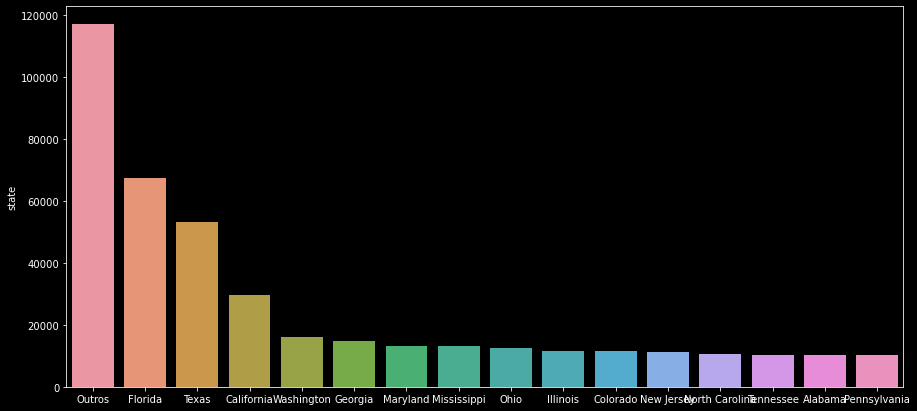

In [74]:
#Agrupando coluna de Hydraulics

#Valor, vamos usar uma regra de quantas quantidades devem ter, e se elas não baterem essa quantidade, eu vou agrupar
state = testes_df_v1['state'].value_counts()

#Lista que vai receber as colunas
colunas = []


#Pecorrendo a lista
for tipo in state.index:
    #O tipo vai ser o nome da coluna, e atraves dela pegar o valor da coluna.
    
    #A regra vai ser valores menores que 4 mil
    if state[tipo] < 4000:
        #adicionado na minha lista vazia
        colunas.append(tipo)
        

#Modificando a minha base para agrupar esses valores
for tipo in colunas:
    testes_df_v1.loc[testes_df_v1['state'] == tipo,'state'] = 'Outros'
    
    
##Analisando em forma grafica
plt.figure(figsize=(15,7))
sns.barplot(
    x=testes_df_v2['state'].value_counts().index,
    y=testes_df_v2['state'].value_counts()
);

- Bem melhor agora agora, temos menos categorias então agora podemos transformar essas colunas em dummy.

In [75]:
#Parte importante, eu vou transformar as colunas categoricas em variaveis dummy

#Primeiro eu vou lista as colunas categoricas, na mão mesmo
lista_cat = ['ProductSize','ProductGroup','Enclosure','Hydraulics','state']

#agora com a ajuda do pandas e so transformar em dummy :)
colunas_categorias = ['ProductSize','ProductGroup','Enclosure','Hydraulics','state']
testes_df_v1 = pd.get_dummies(data=testes_df_v2, columns= colunas_categorias)

In [77]:
#Verificando
testes_df_v1.head()

,SalePrice,YearMade,Year,Month,Day,ProductSize_Compact,ProductSize_Large,ProductSize_Large / Medium,ProductSize_Medium,ProductSize_Mini,...,state_Maryland,state_Mississippi,state_New Jersey,state_North Carolina,state_Ohio,state_Outros,state_Pennsylvania,state_Tennessee,state_Texas,state_Washington
0,66000.0,2004,2006,11,16,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,57000.0,1996,2004,3,26,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,10000.0,2001,2004,2,26,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,38500.0,2001,2011,5,19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,11000.0,2007,2009,7,23,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


- Pra mim está bem melhor assim, então agora vamos para a pratica, vamos testar os modelos novamente 

##### Testando os dados novamente

In [81]:
#Criando uma copia do meu df para não prejudicar os dados originais.
teste_df_v2 = testes_df_v1.copy()

#Separando os dados entre Validação e Train, como podemos ver na descrição do desafio no inicio do projeto
def_val = teste_df_v2[teste_df_v2['Year']==2012]
def_train = teste_df_v2[teste_df_v2['Year']!=2012]

#Seperando entre x e y
x_train, y_train = def_train.drop('SalePrice',axis=1), def_train.SalePrice
x_valid, y_valid = def_val.drop('SalePrice', axis=1), def_val.SalePrice

In [82]:
#Definindo a função que vai avaliar meu modelo

def Avaliarmodelo(nome_modelo,y_test,previsao):
    r2 = r2_score(y_test, previsao)
    RMSE = np.sqrt(mean_squared_error(y_test,previsao))
    RMSLE = np.sqrt(mean_squared_log_error(y_test,previsao))
    return f'O Modelo: {nome_modelo}\nTeve o R² de: {r2:.2%}\nRMSE de: {RMSE:.2f}\nRMSLE de: {RMSLE:.2%}'

In [83]:
modelo_rf = RandomForestRegressor()
modelo_et = ExtraTreesRegressor()
modelo_dc = DecisionTreeRegressor()

Modelos = {
    'RandomForest': modelo_rf,
    'ExtraTress':modelo_et,
    'Decision Tree Regressor':modelo_dc,
}

In [84]:
%%time

for nome_modelo, Modelo in Modelos.items():
    #Treinando o modelo
    Modelo.fit(x_train, y_train)
    #Prevendo
    previsao = Modelo.predict(x_valid)
    #Avaliando
    print(Avaliarmodelo(nome_modelo,y_valid, previsao))
    
    print('='*70)

O Modelo: RandomForest
Teve o R² de: 64.51%
RMSE de: 15612.58
RMSLE de: 41.17%
O Modelo: ExtraTress
Teve o R² de: 60.53%
RMSE de: 16465.67
RMSLE de: 42.76%
O Modelo: Decision Tree Regressor
Teve o R² de: 46.55%
RMSE de: 19161.10
RMSLE de: 51.01%
Wall time: 8min 50s


##### Como podemos notar, o nosso modelo perdeu no quesito de R² e Rmse, isso não é bom pois melhoramos uma métrica e queabramos outras, porém o lance e que eu acho que dessa forma ainda sim, está mais correta, pois da primeira forma que eu fiz, eu usava o codigo da coluna de descrição e não so dela de todas as colunas, ou seja, o modelo considerou ela como valor numerico sendo que são valores de texto, então eu acredito que é por causa disso que tivemos um desempenho melhor na forma de fazer a primeira modelagem, tendo isso em mente eu vou parar por aqui, pois acho que cheguei a um nivel bom, que faz mais sentido e está mais próximo da realidade.

---

#### Etapa 8: Conclusão

##### Nesse projeto eu testei duas formas de modelar os dados, uma que aprendi a pouco tempo e a outra e a que eu mais utilizo, claro que na primeira, o individuo que me ensinou essa tecnica, deixou varias colunas de descrição,Ids... que no meu ponto de vista não acredito ser uteis para o modelo, pois ele pode considerar uma coisa que não é, mas tudo bem, estamos aqui aprender e por isso eu fiz das duas formas, para que tivesse essa base de qual era o melhor modelo, gostei do projeto e me divertir fazendo ele, foi um desafio trabalhar com tantos valores nulos, porém e algo gratificante, obrigado.

### FIM